In [4]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')

In [271]:
class Unfolding:
    def __init__(self,k,t_=1,t=1):
        self.t_= t_
        self.t = t
        self.k = linspace(-pi,pi,k)
        self.val, self.vec = self.eig()
        self.val = real(array(self.val).T)
        self.vec = array(self.vec)
    def tb(self,k):
        t = self.t
        t_ = self.t_
        return array([[0,t+t_*exp(-2j*k)],[t+t_*exp(2j*k),0]])*(-1/2)
    def eig(self):
        val = []
        vec = []
        for i in range(len(self.k)):
            sol  = linalg.eigh(self.tb(self.k[i]))
            val.append(sol[0])
            vec.append(sol[1])
        return (val,vec)  
    def weight(self,position,orbital):
        k = self.k
        vec = self.vec   
        res=zeros(shape=(len(k),len(position)*orbital))
        for i in range(len(k)):
            for j in range(len(position)*orbital):
                phase = exp(-1j*position*k[i])
                proj = dot(phase,vec[i])        
                intensity = proj*conj(proj)
                res[i]=real(intensity)/2
        return(res)
                
    def unfold(self,position,orbital):
        k=self.k
        val = self.val
        w = self.weight(position,orbital)
        plt.figure(figsize=(8,6))
        plt.title("Unfolded Band",size=16)
        plt.plot(k,val.T,c="white")
        plt.scatter(k,val[0],s=w[:,0]*20,c="red")
        plt.scatter(k,val[1],s=w[:,1]*20,c="red")
        plt.ylim(-1,1)
        plt.xlim(-pi,pi)
        plt.plot([-pi/2,-pi/2],[plt.ylim()[0],plt.ylim()[1]],c="white")
        plt.plot([pi/2,pi/2],[plt.ylim()[0],plt.ylim()[1]],c="white")
        plt.plot([-pi,pi],[0,0],c="white")
        plt.xticks([-pi,-pi/2,0,pi/2,pi],["-π","-π/2",0,"π/2","π"],size=16)
        plt.yticks([-1,0,1])
        plt.savefig("unfold.pdf")
        plt.show()
        

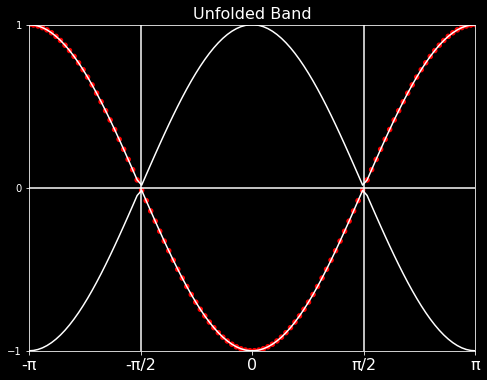

In [275]:
model = Unfolding(t_=1,k=100)
k = model.k
vec = array(model.vec)
val= array(model.val)
model.unfold(position=array([0,1]),orbital=1)

In [210]:
proj = array([[0,1]])

In [211]:
exp(proj)

array([[1.        , 2.71828183]])

In [236]:
orb=array([0,1])
res=zeros(shape=(len(k),len(orb)))
for i in range(len(k)):
    for j in range(len(orb)):
        phase = exp(-1j*orb*k[i])
        proj = dot(phase,vec[i])        
        intensity = proj*conj(proj)
        res[i]=intensity/2
print(res)

[[1.81893235e-65 1.00000000e+00]
 [2.58231617e-32 1.00000000e+00]
 [6.21105998e-33 1.00000000e+00]
 [1.00000000e+00 1.28110070e-32]
 [1.00000000e+00 1.52384920e-36]
 [1.00000000e+00 1.52384920e-36]
 [1.00000000e+00 9.92804716e-33]
 [1.93379444e-33 1.00000000e+00]
 [2.58231617e-32 1.00000000e+00]
 [1.81893235e-65 1.00000000e+00]]


<ipython-input-236-004293c84c72>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  res[i]=intensity/2


<function matplotlib.pyplot.sca(ax)>

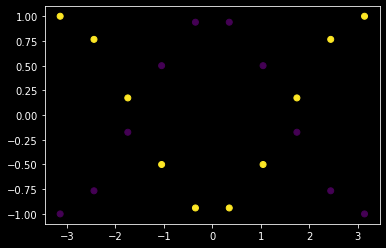

In [243]:
plt.scatter(k,val[0],c=res.T[0])
plt.scatter(k,val[1],c=res.T[1])
plt.sca


In [229]:
phase

array([1.        , 0.04321392])

In [ ]:
exp(-)

In [234]:
dot(exp(-1j*orb*k[0]),vec[0])

array([0.        -6.03147138e-33j, 1.41421356-6.03147138e-33j])

In [56]:
model.weight(array([[0,1]])).T

array([[-0.        , -3.14159265],
       [-0.        , -2.44346095],
       [-0.        , -1.74532925],
       [-0.        , -1.04719755],
       [-0.        , -0.34906585],
       [ 0.        ,  0.34906585],
       [ 0.        ,  1.04719755],
       [ 0.        ,  1.74532925],
       [ 0.        ,  2.44346095],
       [ 0.        ,  3.14159265]])

In [220]:
dot(vec[:2],proj.T)

array([[[ 0.70710678+0.00000000e+00j],
        [-0.70710678-8.65956056e-17j]],

       [[ 0.70710678+0.00000000e+00j],
        [-0.54167522-4.54519478e-01j]]])

In [224]:
vec[8]

array([[-0.70710678+0.j        ,  0.70710678+0.j        ],
       [-0.54167522+0.45451948j, -0.54167522+0.45451948j]])

In [216]:
proj

array([[0, 1]])

In [217]:
vec[0]

array([[-0.70710678+0.00000000e+00j,  0.70710678+0.00000000e+00j],
       [-0.70710678-8.65956056e-17j, -0.70710678-8.65956056e-17j]])

In [34]:
model = Unfolding(t_=1)
# model.unfold([0,1])
k = model.k
val = model.val

In [58]:
vec[0][0]

array([-0.70710678+0.j,  0.70710678+0.j])

In [59]:
vec[0]

array([[-0.70710678+0.00000000e+00j,  0.70710678+0.00000000e+00j],
       [-0.70710678-7.42248048e-17j, -0.70710678-7.42248048e-17j]])

In [208]:
##### Extended Plot


# fig, ax= plt.subplots(2, 2,figsize=(20,12))

# ax[0][0].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[0][0].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[0][0].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[0][0].set_yticks([-1,0,1])
# ax[0][0].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[0][0].set_ylim(-1,1)
# ax[0][0].set_title("Projected Cell",size=16)
# ax[0][0].plot(k,-cos(k),c="w")
# ax[0][0].set_xlim(-pi,pi)
# ax[0][0].set_xticks([-pi,-pi/2,0,pi/2,pi])
# ax[0][0].set_xticklabels(["-π","-π/2",0,"π/2","π"],fontsize=16)
# ax[0][0].set_xlim(-pi,pi)

# ax[0][1].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[0][1].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[0][1].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[0][1].set_yticks([-1,0,1])
# ax[0][1].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[0][1].set_ylim(-1,1)
# ax[0][1].set_title("Supercell",size=16)
# ax[0][1].plot(k,val.T,c="w")
# ax[0][1].set_xlim(-pi/2,pi/2)
# ax[0][1].set_xticks([-pi/2,0,pi/2])
# ax[0][1].set_xticklabels(["-π/2",0,"π/2"],fontsize=16)

# ax[1][0].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[1][0].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[1][0].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[1][0].set_yticks([-1,0,1])
# ax[1][0].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[1][0].set_ylim(-1,1)
# ax[1][0].set_title("Extended Supercell",size=16)
# ax[1][0].plot(k,val.T,c="w")
# ax[1][0].set_xticks([-pi,-pi/2,0,pi/2,pi])
# ax[1][0].set_xticklabels(["-π","-π/2",0,"π/2","π"],fontsize=16)

# ax[1][1].plot([-pi/2,-pi/2],[-1,1],c="white",lw=0.3)
# ax[1][1].plot([pi/2,pi/2],[-1,1],c="white",lw=0.3)
# ax[1][1].plot([-pi,pi],[0,0],c="white",lw=0.3)
# ax[1][1].set_yticks([-1,0,1])
# ax[1][1].set_yticklabels(["-1","0","1"],fontsize=16)
# ax[1][1].set_ylim(-1,1)
# ax[1][1].set_title("Unfolded Band",size=16)
# ax[1][1].plot(k,val.T,c="w")
# ax[1][1].scatter(k,val[0],c="r",s=w[:,0]*20)
# ax[1][1].scatter(k,val[1],c="r",s=w[:,1]*20)
# ax[1][1].set_xlim(-pi,pi)
# ax[1][1].set_xticks([-pi,-pi/2,0,pi/2,pi])
# ax[1][1].set_xticklabels(["-π","-π/2",0,"π/2","π"],fontsize=16)
# plt.savefig("Unfold-1D-TB.pdf")
# plt.show()